<a href="https://colab.research.google.com/github/gabrielatoniolo/dab-dbt-repository/blob/main/Monitoring_analyst_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CloudWalk - Monitoring Analyst Test**


Steps


*   Data exploration in SQL on BigQuery
*   Graph plotation on Python
*   Data encrichment on Pyton
*   ChatGPT help on Python code



# **First task**
Analysis of anomaly behevior in number of sales of POS

**STEP 1 - Data exploration in SQL**

---
Calculate the percentage of growth in the number of sales compared to last month and today.

```
SELECT
  *,
  round((today-avg_last_month)/avg_last_month,2) as growth,
FROM
  `checkout-2`
```




**STEP 2 - Graph plotation in python**

---
CSV data to a DATAFRAME


In [ ]:
#import pandas library
import pandas as pd

In [ ]:
#read csv file and save in anomaly
anomaly1 = pd.read_csv("anomaly_checkout_1.csv")

In [ ]:
#read csv file and save in anomaly
anomaly = pd.read_csv("anomaly_checkout_2.csv")

Plot data in combo chart

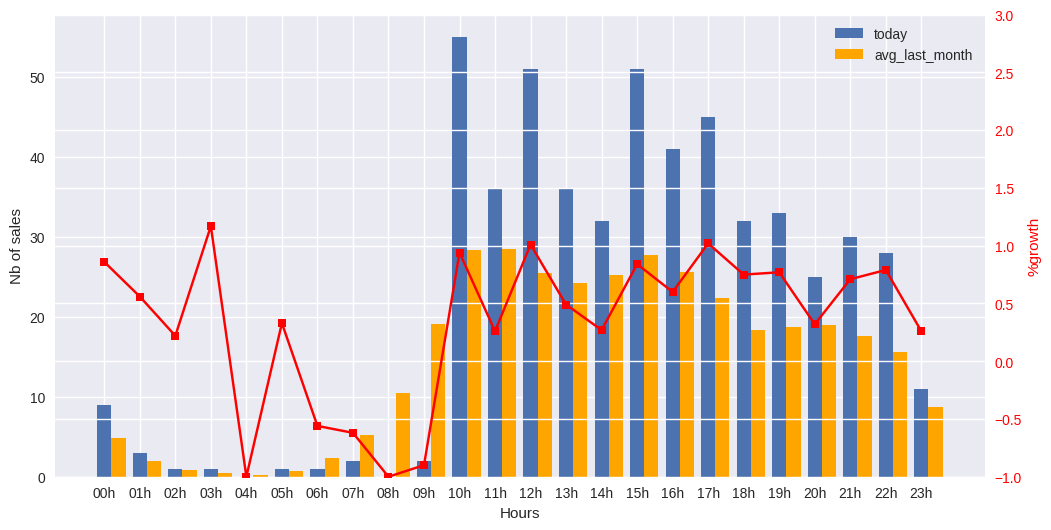

In [ ]:
#import graphs library
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.set_xlabel('Hours')
ax1.set_ylabel('Nb of sales')
ax1.bar(anomaly1['time'],anomaly1['today'],width=0.4, label='today')
#second bar
x = [i + 0.4 for i, _ in enumerate(anomaly['time'])]
ax1.bar(x, anomaly1['avg_last_month'], width=0.4, label='avg_last_month', color='orange')


ax2= ax1.twinx() #set for same axis x
ax2.set_ylabel("%growth",color = 'red')
ax2.plot(anomaly1['time'],anomaly1['growth'],marker = 's',markersize = 6, color = 'red')
ax2.tick_params(axis='y',labelcolor = 'red')
ax2.set_ylim([-1,3])

ax1.legend()

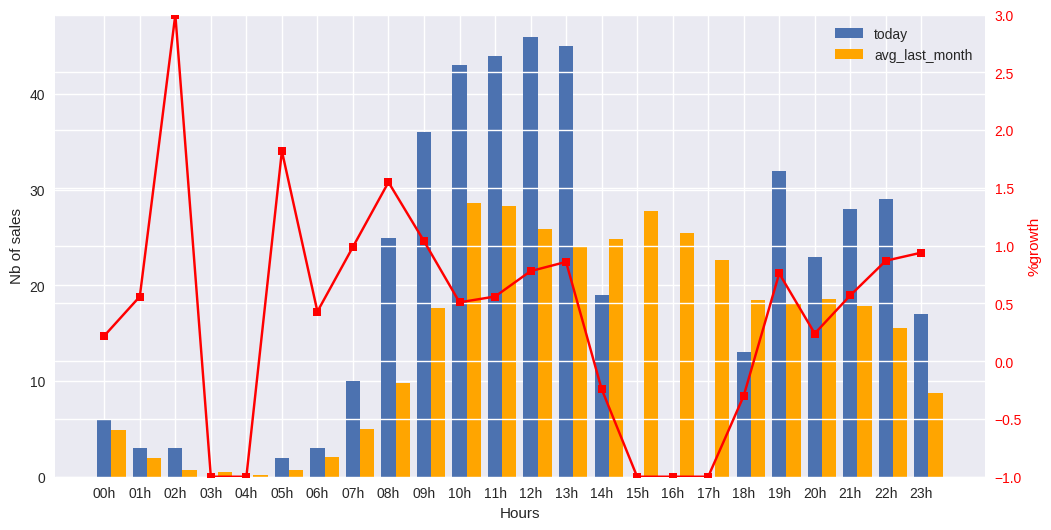

In [ ]:
#import graphs library
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.set_xlabel('Hours')
ax1.set_ylabel('Nb of sales')
ax1.bar(anomaly['time'],anomaly['today'],width=0.4, label='today')
#second bar
x = [i + 0.4 for i, _ in enumerate(anomaly['time'])]
ax1.bar(x, anomaly['avg_last_month'], width=0.4, label='avg_last_month', color='orange')


ax2= ax1.twinx() #set for same axis x
ax2.set_ylabel("%growth",color = 'red')
ax2.plot(anomaly['time'],anomaly['growth'],marker = 's',markersize = 6, color = 'red')
ax2.tick_params(axis='y',labelcolor = 'red')
ax2.set_ylim([-1,3])

ax1.legend()

**STEP 3 - Anomaly Classification**

---
Classify the anomalies in two cases:    

1.   Anomaly 1 - When data is missing.
2.   Anomaly 2 - When there is an outlier number

```
SELECT
  *,
  CASE
  WHEN (today=0 or yesterday=0) and avg_last_month<1 THEN '-'
  WHEN today=0 and avg_last_month>10 THEN 'Anomaly1'
  WHEN per_today>1 and avg_last_month>6 THEN 'Anomaly2'
  ELSE '-'
  END as status
FROM
  `checkout-2`
```


**Case 1**

---

Probably a bug because there are no inputs.

In [ ]:
bug1 = anomaly1[(anomaly1["status"]=='Anomaly1')]
bug1

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
8,08h,0,1,18,8.71,10.42,-1.0,Anomaly1


In [ ]:
bug = anomaly[(anomaly["status"]=='Anomaly1')]
bug

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
15,15h,0,51,42,22.427,27.78,-1.0,Anomaly1
16,16h,0,41,36,21.570,25.53,-1.0,Anomaly1
17,17h,0,45,19,17.710,22.67,-1.0,Anomaly1


**Case 2**

---

An overflow anomaly, which could be an error or a seasonality.

In [ ]:
overfloat1 = anomaly1[(anomaly1["status"]=='Anomaly2')]
overfloat1

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
12,12h,51,39,39,27.57,25.42,1.01,Anomaly2
17,17h,45,30,29,20.42,22.28,1.02,Anomaly2


In [ ]:
overfloat = anomaly[(anomaly["status"]=='Anomaly2')]
overfloat

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
8,08h,25,0,12,3.71,9.82,1.55,Anomaly2
9,09h,36,2,27,10.14,17.64,1.04,Anomaly2


# **Second task**

Monitoring with real time alert with notifications to teams.


*   Recomedantion to 'alert' the anomalies found
*   Query to organize the data on the data
*   A graphic to see the data in real time
*   A model to determine anomalies

- rule-based : define the rules
- Score-base : create a model ML to score the transaciton and make a decision
- Combination of both


---
Alarts required
- if it's `failed` - with problem
- if it's `reversed` - with problem
- if it's `denied`- risk or issuer




**STEP 1 - Data exploration on python**

---
Analyze the number of errors over time.


In [ ]:
t1 = pd.read_csv('transactions_1.csv')
t1

,time,status,f0_
0,00h 00,approved,9
1,00h 00,denied,6
2,00h 00,refunded,1
3,00h 01,denied,8
4,00h 01,approved,13
...,...,...,...
4229,23h 59,processing,4
4230,23h 59,denied,1
4231,23h 59,backend_reversed,5
4232,23h 59,approved,10


Filter When is `denied` or `reversed` or `failed`

In [ ]:
import numpy as np
import seaborn as sns
color_pal = sns.color_palette()

In [ ]:
filtro = t1['status']=='denied'

In [ ]:
t1_denied = t1[('filtro')]
t1_denied = t1_denied.reset_index()

In [ ]:
denied = t1_denied #save in another variable to do other kind of test

In [ ]:
t1_denied = t1_denied[['time','f0_']]

In [ ]:
t1_denied = t1_denied.set_index("time")

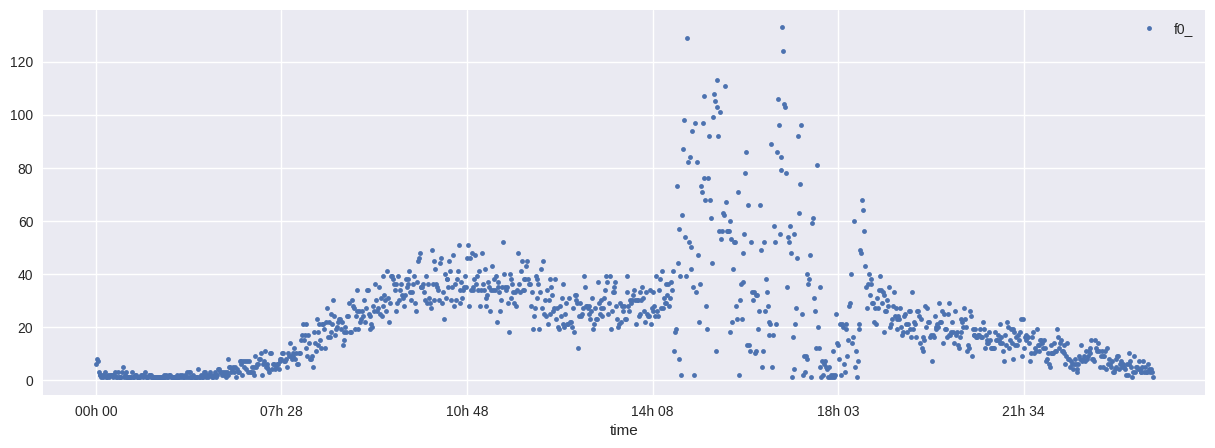

In [ ]:
t1_denied.plot(style = '.',figsize=(15,5),color = color_pal[0])
plt.show()

Rule Based - model to predict error


---



In [ ]:
denied["alarm"] = ""

In [ ]:
mean = denied["f0_"].mean()
print(mean)

22.917543859649122


In [ ]:
denied

,index,time,status,f0_,alarm
0,1,00h 00,denied,6,
1,3,00h 01,denied,8,
2,7,00h 02,denied,7,
3,8,00h 03,denied,3,
4,11,00h 05,denied,2,
...,...,...,...,...,...
1135,4216,23h 55,denied,4,
1136,4218,23h 56,denied,3,
1137,4220,23h 57,denied,4,
1138,4227,23h 58,denied,3,


In a column it's save a variable as *alarm* when there ir a growth in ther number of cases compared to last 5 minutes or if it's bigger then the mean in 7 cases

---



In [ ]:
last = denied['f0_'].iloc[0:5]
med = np.mean(last.values)
u = 0
for i in denied["f0_"]:
  a = denied["f0_"].get(u) #get the value of f0_
  if (a > med and a > mean): #verify if the value is bigger then the list o previus 5 numbers or bigger then the mean
    denied.loc[u,"alarm"] = "alarm-1"
  if a > mean+7:
    denied.loc[u,"alarm"] = "alarm-2"
  u+=1
  last = denied['f0_'].iloc[u-1:u+4]
  med = np.mean(last.values)

In [ ]:
denied[(denied["alarm"]== "alarm-1") | (denied["alarm"]== "alarm-2") ]

,index,time,status,f0_,alarm
238,711,08h 06,denied,23,alarm-1
249,748,08h 17,denied,27,alarm-1
253,760,08h 21,denied,25,alarm-1
256,768,08h 24,denied,30,alarm-2
257,773,08h 25,denied,24,alarm-1
...,...,...,...,...,...
937,3689,20h 31,denied,23,alarm-1
942,3705,20h 36,denied,26,alarm-1
943,3708,20h 37,denied,24,alarm-1
997,3876,21h 31,denied,23,alarm-1


**Message Alert**

---



In [ ]:
import smtplib
from email.message import EmailMessage

In [ ]:
def email_alert(subject,body,to):
  msg = EmailMessage()
  msg.set_content(body)
  msg['subject'] = subject
  msg['to'] = to

  user = "gabrielatoniolob@gmail.com"
  msg['from'] = user
  password = "rekbijqbnbmmwsjw"

  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls()
  server.login(user,password)
  server.send_message(msg)

  server.quit()

if __name__ == '__main__':
  subject = "Hey"
  body = "Hello World"
  to = "gabrielatonio@hotmail.com"
  email_alert(subject,body,to)

# **Model**

**Install mode to execute XGBoost model**

This model didn't work so well to estimate the future values.

In [ ]:
import xgboost as xgb

Types of series data

In [ ]:
t1_denied.index

In [ ]:
t1_denied.index = pd.to_datetime(t1_denied.index, format='%Hh %M') # transforme time to datetype
t1_denied.index = t1_denied.index.strftime('%H:%M')

In [ ]:
t1_denied

Train/Test Split

In [ ]:
train = t1_denied.loc[t1_denied.index < '14:00'] #separate the values before 16h
test = t1_denied.loc[t1_denied.index >= '14:00'] #separate the values after 16h

#make a plot with subplots
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(train.index,train['f0_'], color = 'red')
ax.plot(test.index,test['f0_'], label = "test")
ax.axvline('14:00',color ='black',ls="--")
ax.legend(["Train Set","Test Set"])

# Ajuste o intervalo (2 horas) conforme necessário
ax.set_xticks(test.index[::60],minor = False)
plt.show()

Create our Model

In [ ]:
t1_denied["hour"] = t1_denied.index
t1_denied

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def minutes (df):
  df["min"] = df.index
  df["min"] = df["min"].str.split(':').str[0].astype(int) * 60 + df["min"].str.split(':').str[1].astype(int)
  return df

train = minutes(train)
test = minutes(test)

TARGET = "f0_"
FEATURES = "min"

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg.fit(X_train,y_train,
        eval_set = [(X_train,y_train),(X_test,y_test)],
        verbose=20)

Forcast on Test

In [ ]:
test['prediction'] = reg.predict(X_test)

In [ ]:
t1_denied

In [ ]:
t1_denied = t1_denied.merge(test[['prediction']],how = 'left', left_index = True, right_index= True)

ax = t1_denied[["f0_"]].plot(figsize =(15,5))
t1_denied['prediction'].plot(ax=ax, style='.')
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Dat and Prediciton")
plt.show()